<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8Cex05_earlystop1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls

Saving pkgo_city66_class5_v1.csv to pkgo_city66_class5_v1.csv
pkgo_city66_class5_v1.csv  sample_data


In [ ]:
import numpy as np
np.random.seed(1337)

my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

y_train = my_data[:,200]
y_train = y_train.astype('int')

import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)


# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 50

# Import keras to build a DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.regularizers import l2

### Step 1: 從 keras.callbacks 中 import EerlyStopping  

In [ ]:
# Step 1 HERE
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: 宣告一個 earlystop object 並設定 monitor='val_loss' 與 patience=3

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta=0.0001, patience = 3)

In [ ]:
print('Building current best model with EarlyStopping')
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from tensorflow.keras.optimizers import Adam
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Building current best model with EarlyStopping


### Step 3: 在 fit 時加入 callbacks, 把先前設定的 EarlyStopping 加入

In [ ]:
# Fit models and use validation_split=0.1
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
                    		validation_split=0.1,
                    		callbacks=[early_stopping])

Epoch 1/50
104/104 [==============================] - 1s 6ms/step - loss: 1.8285 - accuracy: 0.4352 - val_loss: 1.1628 - val_accuracy: 0.5815
Epoch 2/50
104/104 [==============================] - 0s 2ms/step - loss: 1.2327 - accuracy: 0.5546 - val_loss: 0.9655 - val_accuracy: 0.6467
Epoch 3/50
104/104 [==============================] - 0s 2ms/step - loss: 1.1278 - accuracy: 0.5881 - val_loss: 1.0135 - val_accuracy: 0.6304
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.5965 - val_loss: 0.9273 - val_accuracy: 0.6522
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.9903 - accuracy: 0.6316 - val_loss: 0.9889 - val_accuracy: 0.6196
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.9967 - accuracy: 0.6308 - val_loss: 0.9162 - val_accuracy: 0.7065
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.6867 - val_loss: 0.8799 - val_accuracy: 0.6793
Epoch 

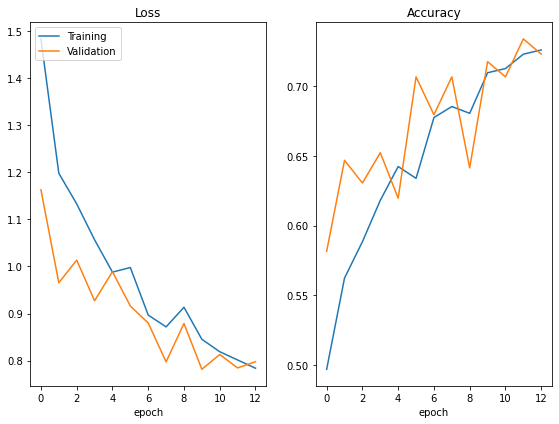

In [ ]:
# Visualize the loss and accuracy of both models
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('accuracy')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_accuracy')

import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.tight_layout()